<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%ED%94%8C%EC%A0%9D3_%EC%9E%AC%EB%A0%B9%EC%A0%84%EC%B2%98%EB%A6%AC_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [68]:
train=pd.read_csv("/content/drive/MyDrive/ESAA/데이터셋/movies_train.csv")
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [45]:
train[['release_time', 'time']].isnull().sum()

release_time    0
time            0
dtype: int64

In [69]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


### 데이트타임으로 바꾸기

In [70]:
train['release_time'] = train.release_time.apply(pd.to_datetime)
train['release_year'] = train.release_time.dt.year
train['release_month'] = train.release_time.dt.month
train['release_day'] = train.release_time.dt.day
train.drop(['release_time'], axis=1)
#train['time'] = train.time.apply(pd.to_time)
train.head()
#train.info()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012,11,22
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,19
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,5
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7,12
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11,4


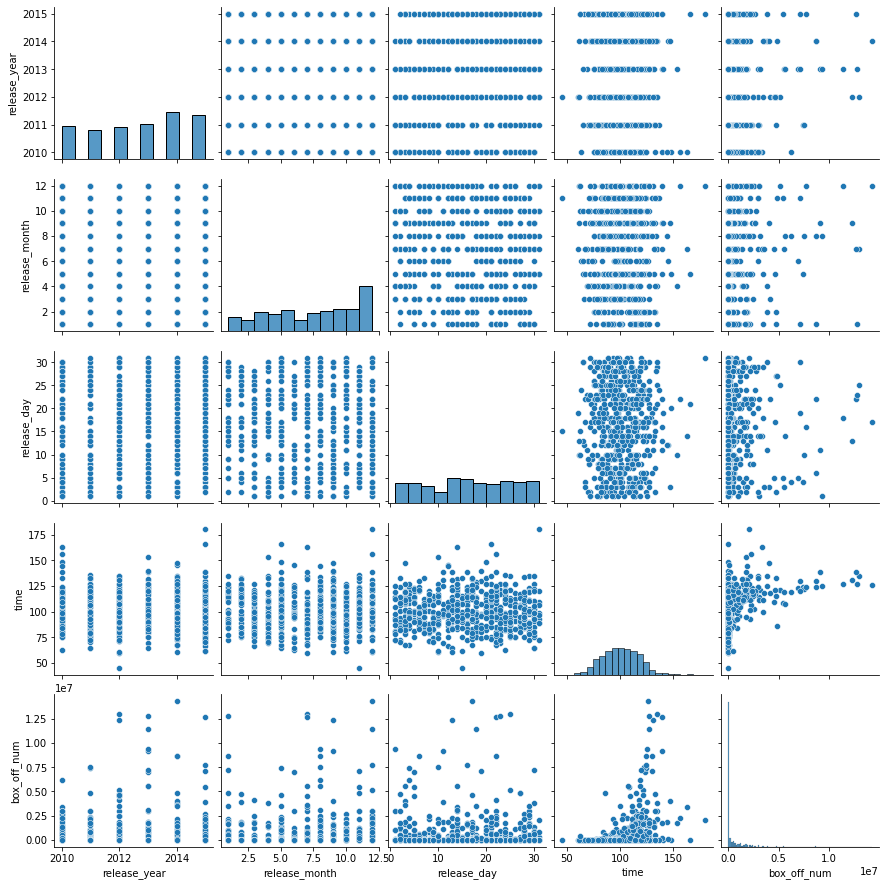

In [47]:
sns.pairplot(train[['release_year', 'release_month', 'release_day', 'time', 'box_off_num']])
plt.show()

* release_time은 삭제해도될듯
* time은 datetime처리하면 안됨

### 인코딩
* 개봉시기를 year, month, day로 나누고
* 개봉시기는 카테고리형변수로 인코딩해서 로그변환 안하기

In [71]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train['release_year'] = encoder.fit_transform(train['release_year'])
train['release_month'] = encoder.fit_transform(train['release_month'])
train['release_day'] = encoder.fit_transform(train['release_day'])
#train = pd.get_dummies(train, columns=['release_year'])
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2,10,21
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,5,10,18
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,3,5,4
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2,6,11
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,0,10,3


### 로그변환
* time 은 로그변환하기
* time은 시각이 아니라 시간이므로 카테고리형 말고 숫자형으로

In [72]:
train['time_log'] = np.log1p(train.time)
train['box_off_num_log'] = np.log1p(train.box_off_num)

### 전처리 후 관계 보기

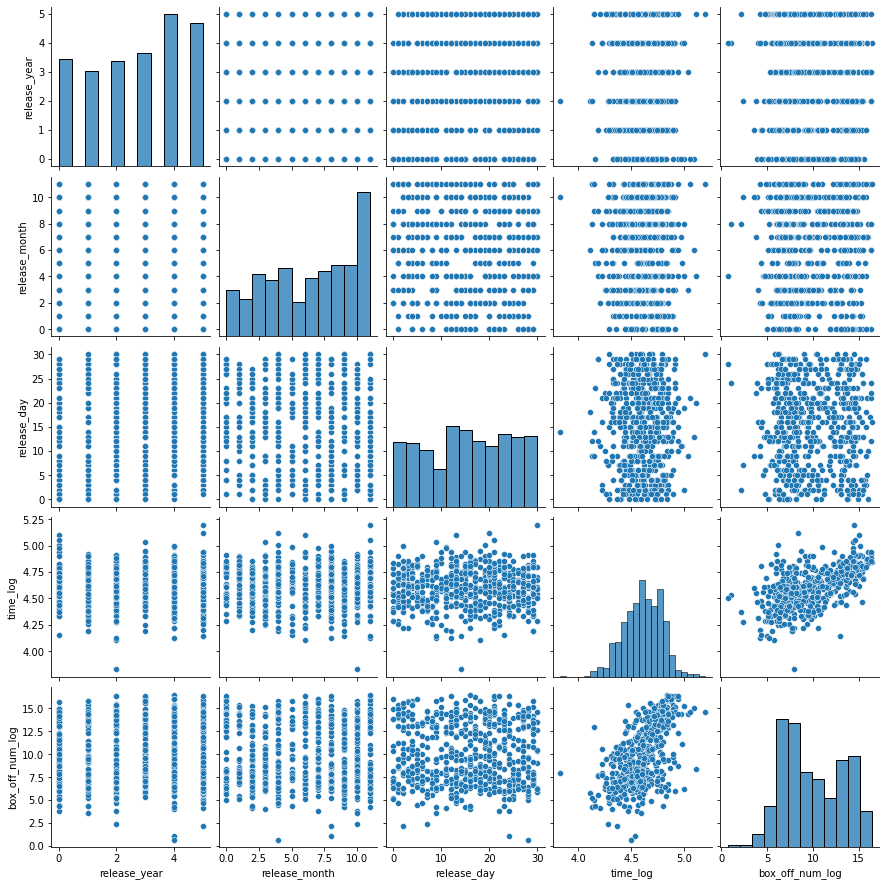

In [61]:
sns.pairplot(train[['release_year', 'release_month', 'release_day', 'time_log', 'box_off_num_log']])
plt.show()

### 범주형 변수인데 로그변환? -> !! 해서나쁠건없어 근데 책에선 안한다.

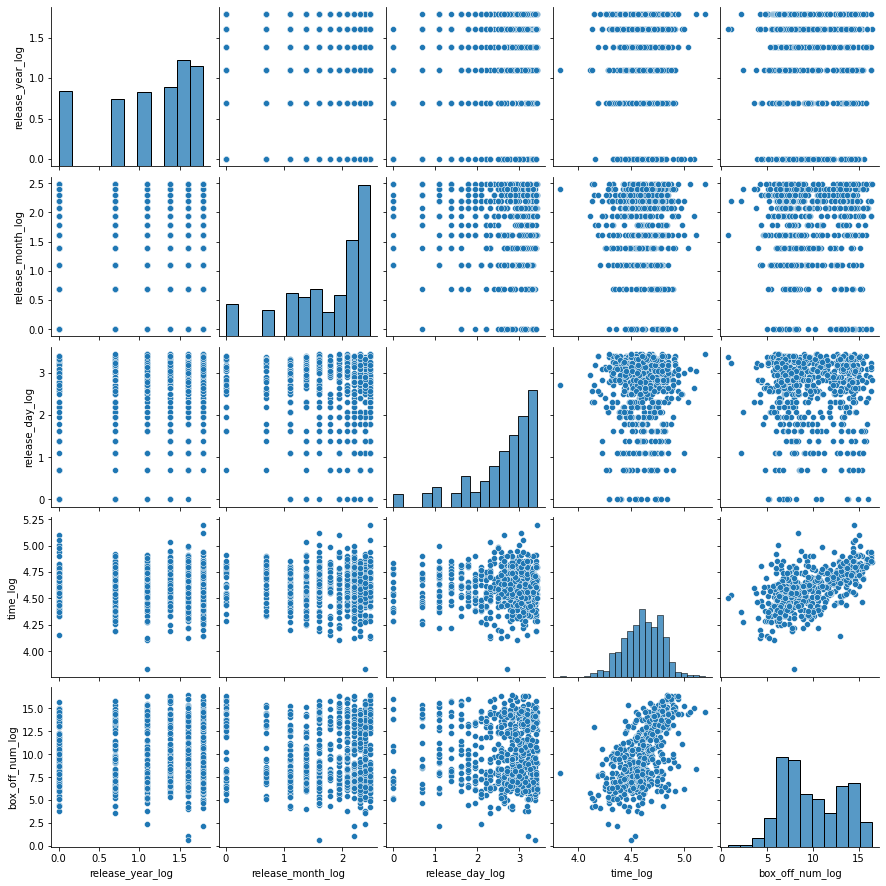

In [62]:
train['release_year_log'] = np.log1p(train.release_year)
train['release_month_log'] = np.log1p(train.release_month)
train['release_day_log'] = np.log1p(train.release_day)

sns.pairplot(train[['release_year_log', 'release_month_log', 'release_day_log', 'time_log', 'box_off_num_log']])
plt.show()

* 로그변환한 버전이 box_off_num 와 상관관계가 더 명확함